# Statistiques de prix de ventes immobilières en France

Ce programme Python dresse un portrait statistique par code postal des prix de ventes immobilières d'une année à partir des données Open Data DVF (https://www.data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres/)

Les données sont disponibles par année et pour toute la France. Il faut enregistrer un des fichiers `*.csv` dans le même répertoire que le Jupyter Notebook ou le fichiers Python. Le code lit d'abors l'ensemble du tableau de données et réalise les statistiques uniquement pour le code postal choisi.

URL "stables" pour le téléchargement direct :
- 2020 https://www.data.gouv.fr/fr/datasets/r/90a98de0-f562-4328-aa16-fe0dd1dca60f
- 2019 https://www.data.gouv.fr/fr/datasets/r/3004168d-bec4-44d9-a781-ef16f41856a2
- 2018 https://www.data.gouv.fr/fr/datasets/r/1be77ca5-dc1b-4e50-af2b-0240147e0346
- 2017 https://www.data.gouv.fr/fr/datasets/r/7161c9f2-3d91-4caf-afa2-cfe535807f04
- 2016 https://www.data.gouv.fr/fr/datasets/r/0ab442c5-57d1-4139-92c2-19672336401c

En tête et import des libraires nécessaires

In [1]:
# -*- coding: utf-8 -*-
"""
Olivier Girou 2021
"""

import pandas as pd
import matplotlib.pyplot as plt

Code postal ciblé au format float, ne pas mettre le '0' pour les département '01' à '09'

In [2]:
codePostal = 38520 #6230

Année ciblée

In [3]:
fichier = "valeursfoncieres-2020.txt"

Lecture du fichier et définition des types de données contenues dans les colonnes

In [4]:
df=pd.read_csv(fichier, sep="|", dtype={
                      "Code service CH ": float,
                      "Reference document " : float,
                      "1 Articles CGI" : float,
                      "2 Articles CGI" : float,
                      "3 Articles CGI" : float,
                      "4 Articles CGI" : float,
                      "5 Articles CGI" : float, 
                      "No disposition" : int,
                      "Date mutation" : str, 
                      "Nature mutation" : str,
                      "Valeur fonciere" : str,
                      "No voie" : float,
                      "B/T/Q" : str,
                      "Type de voie" : str,
                      "Code voie" : str,
                      "Voie" : str,
                      "Code postal" : float,
                      "Commune" : str,
                      "Code departement" : str,
                      "Code commune" : int,
                      "Prefixe de section" : float,
                      "Section" : str,
                      "No plan" : int,
                      "No Volume" : str,
                      "1er lot" : str,
                      "Surface Carrez du 1er lot"  : str,
                      "2eme lot" : str,
                      "Surface Carrez du 2eme lot" : str,
                      "3eme lot" : str,
                      "Surface Carrez du 3eme lot" : str,
                      "4eme lot" : float,
                      "Surface Carrez du 4eme lot" : str,
                      "5eme lot" : float,
                      "Surface Carrez du 5eme lot" : str,
                      "Nombre de lots" : int,
                      "Code type local" : float,
                      "Type local" : str,
                      "Identifiant local" : float,
                      "Surface reelle bati" : float,
                      "Nombre pieces principales"  : float,
                      "Nature culture" : str,
                      "Nature culture speciale" : str,
                      "Surface terrain" : float,
                      })

Transformation de la variable *`"Valeur fonciere"`* en `float` (nombre décimal)

In [5]:
df["Valeur fonciere float"]=df["Valeur fonciere"].str.replace(",",".").astype(float)

Réduction du tableau de données à la ville d'intérêt

In [6]:
dfVille = df[df["Code postal"] == codePostal]

"Tamisage" des données pour retirer les valeurs incohérentes et recentrer l'analyse sur des types de biens immobliers spécifiques

In [7]:
dfVilleCible = dfVille[(dfVille["Type local"] == "Maison")]

# dfVilleCible = dfVille[(dfVille["Type local"] == "Appartement")
#                       &(dfVille["Surface reelle bati"] > 20)
#                       &(dfVille["Surface reelle bati"] < 60)
#                       &(dfVille["Valeur fonciere float"] > 100000)
#                       &(dfVille["Valeur fonciere float"] < 1200000)
#                       ]

Analyse statistique des valeurs foncières

In [8]:
print(dfVilleCible["Valeur fonciere float"].describe())

count        51.000000
mean     177316.745098
std       95379.557828
min        5000.000000
25%      101100.000000
50%      180000.000000
75%      258035.000000
max      350000.000000
Name: Valeur fonciere float, dtype: float64


Analyse statistique des surfaces de bâti

In [9]:
print(dfVilleCible["Surface reelle bati"].describe())

count     51.000000
mean      76.372549
std       36.786933
min       13.000000
25%       52.000000
50%       72.000000
75%       93.000000
max      170.000000
Name: Surface reelle bati, dtype: float64


Création de la série `"dfVilleCiblePrixm2"` et analyse statistique de la série

In [10]:
dfVilleCiblePrixm2 = dfVilleCible["Valeur fonciere float"] / dfVilleCible["Surface reelle bati"]

print(dfVilleCiblePrixm2.describe())

count       51.000000
mean      2647.747017
std       3019.827796
min        250.000000
25%       1612.903226
50%       2150.000000
75%       2629.389474
max      22692.307692
dtype: float64


Création et affichage des histogrammes de distribution statistiques des prix au m²

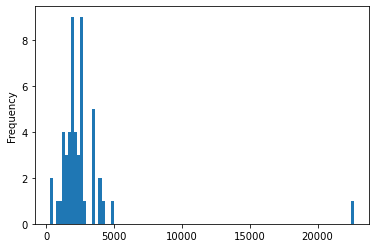

In [11]:
plt.figure()
dfVilleCiblePrixm2.plot.hist(bins=100)
plt.show()